#### 1. Geometry of Vectors

Vectors can be interpreted in two ways:

- **As points** in space, representing positions relative to an origin.
- **As directions**, representing displacements from the origin or between points.  

A vector $\mathbf{x}$ can be written as a **column**:
$\mathbf{x} = \begin{bmatrix} x_1 \ x_2 \ \vdots \ x_n \end{bmatrix}$

or as its **transpose (row vector)**:
$\mathbf{x}^\top = \begin{bmatrix} x_1 & x_2 & \dots & x_n \end{bmatrix}$

These are two representations of the same list of numbers.

#### 2. Dot Products and Angles

The **dot product** of two vectors $\mathbf{u}$ and $\mathbf{v}$ is:
$\mathbf{u} \cdot \mathbf{v} = \sum_i u_i v_i$

This operation is symmetric and relates directly to geometry:
$\mathbf{u} \cdot \mathbf{v} = |\mathbf{u}| |\mathbf{v}| \cos\theta$

where $\theta$ is the angle between the vectors. From this, we get:
$\theta = \arccos\left(\frac{\mathbf{u}\cdot\mathbf{v}}{|\mathbf{u}||\mathbf{v}|}\right)$

This holds in any dimension, not just two or three.

#### Cosine Similarity

A common machine-learning quantity derived from the dot product is **cosine similarity**:

cosine_similarity $(\mathbf{u},\mathbf{v}) = \frac{\mathbf{u}\cdot\mathbf{v}}{|\mathbf{u}||\mathbf{v}|}$

It measures directional similarity between vectors regardless of magnitude.



In [2]:
# compute the angle between a pair of vectors:

%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l


def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

#### 3. Hyperplanes

A **hyperplane** in $d$-dimensional space is the set of points satisfying a linear equation:
$\mathbf{w}\cdot\mathbf{x} = c$

- In 2D, this is a line.
- In 3D, it’s a plane.
- In $d$ dimensions, it has $d{-}1$ dimensions.

The **inequalities** $\mathbf{w}\cdot\mathbf{x} > c$ and $\mathbf{w}\cdot\mathbf{x} < c$ define two **half-spaces** separated by the hyperplane.  
- 2D:
![2D- 1](./Images/22/hyperplane1.png)
![2D- 2](./Images/22/hyperplane2.png)
- High dimension
![high-dim](./Images/22/hyperplane-highdim.png)


In [3]:
# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)



In [4]:
print(train[0][0].shape) # (1, 28, 28): 1 channel (grayscale), 28×28 pixels
print(train[0][1]) # label 9 (Ankle boot)

torch.Size([1, 28, 28])
9


In [5]:
# x[0] - The image tensor (28×28 pixels)
# x[1] - The label (0-9 for different clothing types)
# if x[1] == 0 - Filters only images with label 0 (T-shirts)
# if x[1] == 1 - Filters only images with label 1 (Trousers)
# * 256 - Scales pixel values from [0,1] back to [0,255] range
# torch.stack(...) - Combines all filtered images into a single tensor

# X_train_0 → all T-shirt images from training set
X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)

# X_train_1 → all Trouser images from training set
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)

# X_test → all T-shirt and Trouser images from test set
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)

# y_test → labels (0 or 1) for all T-shirt and Trouser images from test set
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

print(X_train_0.shape)
print(X_train_1.shape)
print(X_test.shape)
print(y_test.shape)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

torch.Size([6000, 1, 28, 28])
torch.Size([6000, 1, 28, 28])
torch.Size([2000, 1, 28, 28])
torch.Size([2000])


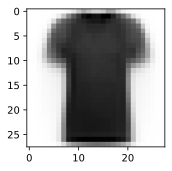

In [6]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

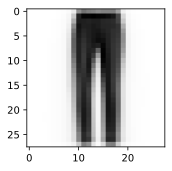

In [7]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In [8]:
# Print test set accuracy with eyeballed threshold


# The weight vector (difference between average trouser and T-shirt)
w = (ave_1 - ave_0).T

# '@' is Matrix Multiplication operator in pytorch.
# X_test.reshape(2000, -1) flattens each 28x28 image into a vector of size 784: (2000, 784)
# In a fully machine learned solution, we would learn the threshold from the dataset. 
# In this case, I simply eyeballed a threshold that looked good on the training data by hand.

# w: direction from T-shirt to Trouser in 784-dimensional pixel space.
# image @ w, you're measuring how much the image aligns with that direction.
    #                 Trouser direction (w)
    #                      ↗
    #                    /
    #                  /
    # T-shirt ●------●------→ Trouser
    #        ave_0   origin   ave_1
    #                  \
    #                    \
    #                      ↘
    #                 (negative projection, T-shirt direction)
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

/tmp/ipykernel_13816/1381869222.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  w = (ave_1 - ave_0).T


tensor(0.7870, dtype=torch.float64)

#### 4. Geometry of Linear Transformations

Matrices represent **linear transformations** from one vector space to another. Conceptually, they manipulate lengths and directions, and their action can be visualized by seeing how they distort shapes such as grids or parallelograms.

![matrix transformation](./Images/22/matrix-transformation.png)


#### 5. Linear Dependence

A set of vectors $\mathbf{v}_1, \ldots, \mathbf{v}_k$ is **linearly dependent** if there exist scalars $a_1, ..., a_k$, not all zero, such that:
$\sum_{i=1}^k a_i \mathbf{v}_i = \mathbf{0}$

Linear dependence means one vector can be written as a combination of others, which causes **dimension compression** in transformations.


#### 6. Rank

The **rank** of a matrix $\mathbf{A}$ is the maximum number of linearly independent columns (or rows). It tells us the dimension of the space that the matrix maps into.

If $\text{rank}(\mathbf{A}) < n$ for an $n\times n$ matrix, the transformation loses information along some directions.

#### 7. Invertibility

An $n\times n$ matrix $\mathbf{A}$ is **invertible** if there exists $\mathbf{A}^{-1}$ such that:
$\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$

This is possible only when $\mathbf{A}$ has full rank.


In [9]:
# invertible matrix example

M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])

#### 8. Determinant

The **determinant** $\det(\mathbf{A})$ has a geometric interpretation as the **volume scaling factor** of the linear transformation represented by $\mathbf{A}$. 

For a $2\times 2$ matrix:
$\det\begin{bmatrix} a & b \ c & d \end{bmatrix} = ad - bc$

If $\det(\mathbf{A}) = 0$, $\mathbf{A}$ collapses volume into a lower dimension, and is not invertible.


In [10]:
# determinant example

torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)

#### 9. Tensors and Linear Algebra Operations

Tensors generalize matrices to higher dimensions. Many matrix operations arise as **tensor contractions**, e.g.,

- Dot product: $v_i w_i$
- Vector norm: $\|\mathbf{v}\|_2^2 = v_i v_i$
- Matrix multiplication: $(\mathbf{A}\mathbf{B})_{ik} = \sum_j a_{ij}b_{jk}$

**Einstein summation notation** is used to simplify repeated-index contractions. 

In [11]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

In [12]:
# Reimplement matrix multiplication
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

In [ ]:
# using Einstein summation notation to reimplement matrix multiplication

# The notation "ij, j -> i":
# Part	  Meaning
# ij	  Matrix A has 2 dimensions: rows (i) and columns (j)
# j	      Vector v has 1 dimension (j)
# ->	  Produces output with...
# i	      ...only dimension i (the row dimension)

# What happens:
# Matching indices (j): The column index of A aligns with the index of v
# Summation: Index j appears on the left but NOT on the right of ->, so it gets summed over
# Result: A vector with dimension i (number of rows in A)

torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

In [ ]:
# output[k, l] = Σᵢ Σⱼ B[i,j,k] * A[i,l] * v[j]

torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])

In [21]:
# Correct equivalent:
# Step 1: B[i,j,k] * v[j] summed over j → gives shape (i, k)
# Step 2: Then multiply by A[i,l] and sum over i → gives shape (k, l)

# Method 1: Using tensordot
result1 = torch.tensordot(torch.tensordot(B, v, dims=([1], [0])), A, dims=([0], [0]))

# Method 2: Step by step
Bv = torch.einsum("ijk, j -> ik", B, v)  # (2, 3) - sum over j
result2 = torch.einsum("ik, il -> kl", Bv, A)  # (3, 2) - sum over i

# Method 3: Explicit loops (for understanding)
result3 = torch.zeros(3, 2)
for k in range(3):
    for l in range(2):
        for i in range(2):
            for j in range(2):
                result3[k, l] += B[i, j, k] * A[i, l] * v[j]

result3

tensor([[ 90., 126.],
        [102., 144.],
        [114., 162.]])

==================== Eigendecompositions =====================

### Eigendecomposition

This section explains the **eigendecomposition of matrices**, including eigenvalues, eigenvectors, and how they relate to matrix transformations and diagonalization — foundational for understanding PCA, spectral methods, and linear dynamical systems.

#### What Are Eigenvalues and Eigenvectors

For a square matrix $\mathbf{A}\in\mathbb{R}^{n\times n}$, if there exists a nonzero vector $\mathbf{v}$ and scalar $\lambda$ such that:

$$
\mathbf{A}\mathbf{v} = \lambda \mathbf{v}
$$

then:

- $\mathbf{v}$ is called an **eigenvector** of $\mathbf{A}$
- $\lambda$ is the corresponding **eigenvalue**

This means **$\mathbf{v}$ is a direction that $\mathbf{A}$ scales by $\lambda$ without changing direction**.

#### Characteristic Equation

To find eigenvalues, solve:

$$
\det(\mathbf{A}-\lambda\mathbf{I}) = 0
$$

This is the **characteristic polynomial** in $\lambda$. Its roots are the eigenvalues of $\mathbf{A}$.

Once $\lambda$ is found, eigenvectors satisfy:

$$
(\mathbf{A}-\lambda\mathbf{I})\mathbf{v}=\mathbf{0}
$$

#### Eigendecomposition

If a matrix $\mathbf{A}$ has $n$ linearly independent eigenvectors, you can form:

- $\mathbf{V}=[\mathbf{v}_1,\ldots,\mathbf{v}_n]$: matrix of eigenvectors
- $\mathbf{\Lambda}=\text{diag}(\lambda_1,\ldots,\lambda_n)$: diagonal matrix of eigenvalues

Then:

$$
\mathbf{A} = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^{-1}
$$

This is the **eigendecomposition** of $\mathbf{A}$. It expresses $\mathbf{A}$ in a basis where it acts like a simple scaling by eigenvalues.

#### Diagonalization and Change of Basis

Eigendecomposition is a **change of basis**:

- Columns of $\mathbf{V}$ form a new basis
- In this basis, $\mathbf{A}$ becomes diagonal with entries $\lambda_i$
- Diagonal matrices are easy to manipulate, e.g., raising $\mathbf{A}$ to a power:

$$
\mathbf{A}^k = \mathbf{V}\mathbf{\Lambda}^k\mathbf{V}^{-1}
$$

This is computationally useful for repeated transformations.

#### Geometric Interpretation

Eigendecomposition shows how a matrix transforms space:

- Each eigenvector $\mathbf{v}_i$ is a direction that $\mathbf{A}$ simply **scales** by $\lambda_i$
- Directions not aligned with eigenvectors get mixed
- Eigenvalues indicate stretching ($|\lambda_i|>1$) or compression ($|\lambda_i|<1$)

#### Examples and Intuition

##### Example: 2×2 matrix

For a simple 2×2 matrix:

$$
\mathbf{A}=\begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

- Solve $\det(\mathbf{A}-\lambda\mathbf{I})=0$ to find $\lambda$
- Substitute each $\lambda$ into $(\mathbf{A}-\lambda\mathbf{I})\mathbf{v}=0$ to get the corresponding eigenvector

Eigendecomposition fully describes $\mathbf{A}$’s action on $\mathbb{R}^2$.

#### Connection to Singular Value Decomposition (SVD)

- Eigenvalues/eigenvectors apply to square matrices
- SVD generalizes the concept to any matrix $\mathbf{A}\in\mathbb{R}^{m\times n}$

SVD decomposes $\mathbf{A}$ as:

$$
\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top
$$

and is related to eigen decomposition of $\mathbf{A}^\top\mathbf{A}$.

#### Summary

- An **eigenvector** of $\mathbf{A}$ points in a direction scaled (not rotated) by $\mathbf{A}$
- **Eigenvalues** quantify how much scaling occurs
- **Eigendecomposition** expresses a matrix in terms of its eigenvectors and eigenvalues
- Symmetric matrices have **orthogonal eigenvector bases**, simplifying many algorithms (e.g., PCA)

#### Orthogonal Diagonalization (Symmetric Case)

##### Theorem (Spectral Theorem)

If a real matrix
$$
A \in \mathbb{R}^{n \times n}
\quad \text{and} \quad
A = A^\top,
$$
then $A$ can always be **orthogonally diagonalized**:

$$
A = Q \Lambda Q^\top
$$

where:

- $Q \in \mathbb{R}^{n \times n}$ is an **orthogonal matrix**
  - columns of $Q$ are **orthonormal eigenvectors** of $A$
  - $Q^\top Q = QQ^\top = I$
- $\Lambda \in \mathbb{R}^{n \times n}$ is a **diagonal matrix**
  - diagonal entries are the **real eigenvalues** of $A$

This result is guaranteed by the **spectral theorem**.

##### Meaning of “Orthogonal” Diagonalization

- The eigenvectors of a symmetric matrix can be chosen to be:
  - mutually perpendicular
  - unit length
- Changing coordinates to this eigenvector basis removes all interactions between dimensions.

In this basis, the matrix acts as:
$\mathbf{y} = \Lambda \mathbf{x}$
i.e., each coordinate is scaled independently.

##### Why Symmetry Matters

Symmetry ensures:

1. All eigenvalues of $A$ are **real**
2. Eigenvectors span the entire space
3. Eigenvectors associated with distinct eigenvalues are **orthogonal**

Without symmetry, a matrix may fail to be diagonalizable.

##### Geometric Interpretation

A symmetric matrix represents a linear transformation that:
- stretches or compresses space,
- may reflect across certain axes,
- but does **not** rotate or shear.

Each eigenvector defines an axis along which scaling occurs by its eigenvalue.

##### Computational Benefits

Because $Q^\top = Q^{-1}$:

- **Matrix inverse** (if all eigenvalues are nonzero):
$
A^{-1} = Q \Lambda^{-1} Q^\top
$

- **Matrix powers**:
$
A^k = Q \Lambda^k Q^\top
$

- **Quadratic forms**:
$
\mathbf{x}^\top A \mathbf{x}
= \sum_i \lambda_i (\mathbf{q}_i^\top \mathbf{x})^2
$

These properties make symmetric matrices especially important in machine learning.

##### Special Cases

- **Positive definite**:
  $
  \lambda_i > 0
  \quad \Rightarrow \quad \text{pure stretching}
  $

- **Positive semidefinite**:
  $
  \lambda_i \ge 0
  \quad \Rightarrow \quad \text{stretching or flattening}
  $

- **Indefinite**:
  eigenvalues of mixed signs → saddle-shaped geometry

##### Common Machine Learning Examples

- Covariance matrices
- Hessians of scalar loss functions
- Graph Laplacians
- Kernel (Gram) matrices

All rely on orthogonal diagonalization.

##### One-Line Summary

> Any real symmetric matrix admits an orthogonal eigendecomposition with real eigenvalues and orthonormal eigenvectors.

In [1]:
%matplotlib inline
import torch
from IPython import display
from d2l import torch as d2l

torch.linalg.eig(torch.tensor([[2, 1], [2, 3]], dtype=torch.float64))

torch.return_types.linalg_eig(
eigenvalues=tensor([1.+0.j, 4.+0.j], dtype=torch.complex128),
eigenvectors=tensor([[-0.7071+0.j, -0.4472+0.j],
        [ 0.7071+0.j, -0.8944+0.j]], dtype=torch.complex128))

#### Gershgorin Circle Theorem

The **Gershgorin Circle Theorem** provides simple and effective **bounds on the locations of eigenvalues** of a square matrix using only its entries.

##### Theorem Statement

Let $A = [a_{ij}] \in \mathbb{C}^{n \times n}$.  
For each row $i$, define the **Gershgorin disc**:

$$
D_i = \left\{ z \in \mathbb{C} \;\middle|\; |z - a_{ii}| \le \sum_{j \ne i} |a_{ij}| \right\}
$$

Then **every eigenvalue of $A$** lies in **at least one** of these discs:

$$
\text{Spec}(A) \subseteq \bigcup_{i=1}^n D_i
$$

##### Interpretation

- Each disc is centered at the diagonal entry $a_{ii}$.
- The radius is the sum of the magnitudes of the off-diagonal entries in that row.
- Eigenvalues must lie **near the diagonal**, unless off-diagonal terms are large.

##### Column Version

There is an equivalent formulation using columns:

$$
|z - a_{ii}| \le \sum_{j \ne i} |a_{ji}|
$$

You may use either row-based or column-based discs.

##### Key Consequences

1. **Eigenvalue localization**  
   Quickly estimates where eigenvalues are without computing them.

2. **Diagonal dominance ⇒ stability**  
   If
   $$
   |a_{ii}| > \sum_{j \ne i} |a_{ij}| \quad \forall i
   $$
   then:
   - All eigenvalues are nonzero
   - The matrix is invertible

3. **Separated discs imply eigenvalue count**  
   If a group of $k$ discs is disjoint from the others, then exactly $k$ eigenvalues lie inside that group.

##### Symmetric / Real Case

If $A$ is real and symmetric:
- Eigenvalues are real
- Gershgorin discs reduce to **intervals on the real line**

This gives easy bounds on minimum and maximum eigenvalues.

##### Intuition

- Diagonal entries pull eigenvalues toward themselves.
- Off-diagonal entries "spread" eigenvalues outward.
- Strong diagonal dominance ⇒ eigenvalues close to diagonal.

##### Why This Matters (ML & Numerical Linear Algebra)

- Estimating eigenvalue ranges (e.g., Hessians, covariance matrices)
- Checking invertibility and conditioning
- Stability analysis of iterative methods
- Preconditioning and convergence guarantees

##### One-Line Summary

> Every eigenvalue of a matrix lies within at least one Gershgorin disc centered at a diagonal entry, with radius given by the sum of the off-diagonal magnitudes.

#### Example:

We consider the matrix

$$
A =
\begin{bmatrix}
1.0 & 0.1 & 0.1 & 0.1 \\
0.1 & 3.0 & 0.2 & 0.3 \\
0.1 & 0.2 & 5.0 & 0.5 \\
0.1 & 0.3 & 0.5 & 9.0
\end{bmatrix}.
$$

We compute the Gershgorin radii:

$$
r_1 = 0.3,\quad r_2 = 0.6,\quad r_3 = 0.8,\quad r_4 = 0.9.
$$

Since the matrix is **symmetric**, all eigenvalues are **real**. Therefore, all eigenvalues must lie within one of the following intervals:

$$
[a_{11} - r_1,\; a_{11} + r_1]
= [0.7,\; 1.3],
$$

$$
[a_{22} - r_2,\; a_{22} + r_2]
= [2.4,\; 3.6],
$$

$$
[a_{33} - r_3,\; a_{33} + r_3]
= [4.2,\; 5.8],
$$

$$
[a_{44} - r_4,\; a_{44} + r_4]
= [8.1,\; 9.9].
$$

In [14]:
A = torch.tensor([[1.0, 0.1, 0.1, 0.1],
              [0.1, 3.0, 0.2, 0.3],
              [0.1, 0.2, 5.0, 0.5],
              [0.1, 0.3, 0.5, 9.0]])

v, _ = torch.linalg.eig(A)
v

tensor([9.0803+0.j, 0.9923+0.j, 4.9539+0.j, 2.9734+0.j])

#### A Useful Application: The Growth of Iterated Maps

Now we explore a powerful application of eigenvalue theory that has deep connections to neural network training.

##### The Problem: Repeated Matrix Application

Consider a simplified neural network where we ignore non-linearities. The forward pass through $N$ layers becomes:

$$\mathbf{v}_{out} = \mathbf{A}^N \mathbf{v}_{in}$$

What happens to the vector as we apply $\mathbf{A}$ repeatedly?

- **If vectors grow**: Small input changes get amplified into huge output changes → model becomes unstable
- **If vectors shrink**: After many layers, output becomes nearly independent of input → model can't learn

##### Why Eigenvalues Matter

The key insight: **long-term behavior is dominated by the largest eigenvalue**.

When we repeatedly apply $\mathbf{A}$:
1. A random vector has components in all eigenvector directions
2. Each application stretches by the corresponding eigenvalue
3. After many iterations, the **principal eigenvector** (largest eigenvalue) dominates
4. The stretching factor converges to **the largest eigenvalue's magnitude**

##### The Spectral Radius

The **spectral radius** $\rho(\mathbf{A})$ is the maximum magnitude among all eigenvalues:

$$\rho(\mathbf{A}) = \max_i |\lambda_i|$$

Its behavior determines stability:
- $\rho(\mathbf{A}) > 1$: Vectors **explode** exponentially
- $\rho(\mathbf{A}) < 1$: Vectors **vanish** exponentially  
- $\rho(\mathbf{A}) = 1$: Vectors remain **stable**

#### Experiment: Observing Explosive Growth

Let's create a random matrix and see what happens when we repeatedly apply it to a vector. We'll track the norm of the vector after each iteration.

In [18]:
torch.manual_seed(42)

k = 5
A = torch.randn(k, k, dtype=torch.float64)
A

tensor([[ 0.2996,  0.2424,  0.2832, -0.2329,  0.6712],
        [ 0.7818, -1.7903, -1.7484,  0.1735, -0.1182],
        [-1.7446, -0.4695,  0.4573,  0.5177, -0.2771],
        [-0.6641,  0.6551,  0.2616, -1.5265, -0.3311],
        [-0.6378,  0.1072,  0.7096,  0.3009, -0.2869]], dtype=torch.float64)

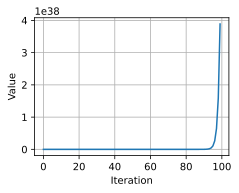

In [19]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

# The norm is growing uncontrollably!
d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

The norm grows uncontrollably! This is **exponential growth** — exactly what happens with exploding gradients in deep networks.

#### Finding the Stretching Factor

Let's compute the ratio $\frac{\|\mathbf{A}^k\mathbf{v}\|}{\|\mathbf{A}^{k-1}\mathbf{v}\|}$ at each step. Theory predicts this should converge to the **largest eigenvalue magnitude**.

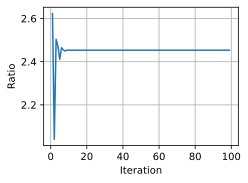

In [ ]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

The ratio converges to approximately **2.45** — this is the spectral radius of our matrix! The small fluctuations at the end are due to floating-point precision.

#### Verifying with Actual Eigenvalues

Let's compute the actual eigenvalues and confirm our observation.

In [20]:
# Compute the eigenvalues
eigs = torch.linalg.eig(A).eigenvalues.tolist()
norm_eigs = [torch.abs(torch.tensor(x)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [tensor(0.3490), tensor(1.1296), tensor(1.1296), tensor(1.1828), tensor(2.4532)]


The largest eigenvalue magnitude matches our observed stretching factor! This confirms the theory.

#### The Fix: Rescaling by Spectral Radius

To stabilize the iteration, we **divide the matrix by its spectral radius**:

$$\mathbf{A}_{normalized} = \frac{\mathbf{A}}{\rho(\mathbf{A})}$$

This ensures the new largest eigenvalue has magnitude 1, so vectors neither explode nor vanish.

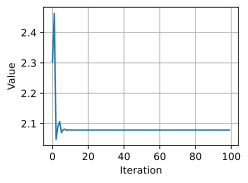

In [21]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

Now the norms stabilize instead of exploding! The vector reaches an equilibrium.

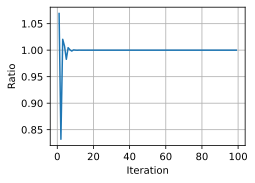

In [22]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

The ratio now oscillates around 1.0 instead of being consistently above 1. The oscillations occur because there are other eigenvalues with magnitude close to 1 that compete with the principal eigenvalue.

#### Connection to Deep Learning: Vanishing & Exploding Gradients

This theory directly explains the **vanishing and exploding gradient problem** in neural networks:

**In RNNs**, gradients involve products of weight matrices across time:
$$\frac{\partial \mathbf{h}_t}{\partial \mathbf{h}_0} \propto \mathbf{W}_{hh}^t$$

The spectral radius of $\mathbf{W}_{hh}$ determines:
- $\rho(\mathbf{W}_{hh}) > 1$: Gradients **explode** → training fails
- $\rho(\mathbf{W}_{hh}) < 1$: Gradients **vanish** → no learning for early time steps

**Practical Solutions in Deep Learning:**
1. **Proper weight initialization** (Xavier/He) aims to keep spectral radius ≈ 1
2. **Gradient clipping** prevents explosion by capping gradient norms
3. **Architectures like LSTM/GRU** use gating to control information flow

> **Key Takeaway**: The abstract concept of eigenvalues has very concrete implications — the spectral radius controls whether your network can learn or suffers from numerical instability.

====================== Single Variable Calculus ======================

### Single-Variable Calculus

This section reviews the core ideas of calculus in one variable that are commonly used in machine learning, including derivatives, rules of differentiation, and interpretations of gradients.

#### Derivatives: Instantaneous Rate of Change

For a function $f(x)$, the **derivative** at a point $x$ measures the instantaneous rate of change of $f$ with respect to $x$. Formally:

$$
f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}.
$$

This captures how $f(x)$ changes for a very small change in $x$.

#### Common Derivatives

Some basic derivative rules:

- Power rule:
  $$
  \frac{d}{dx} x^n = n x^{n-1}
  $$

- Exponential:
  $$
  \frac{d}{dx} e^x = e^x
  $$

- Logarithmic:
  $$
  \frac{d}{dx} \ln x = \frac{1}{x}
  $$

- Constant multiple:
  $$
  \frac{d}{dx} [c f(x)] = c f'(x)
  $$

#### Sum and Constant Rules

- Sum rule:
  $$
  \frac{d}{dx} [f(x) + g(x)] = f'(x) + g'(x)
  $$

- Constant rule:
  $$
  \frac{d}{dx} c = 0
  $$

#### Product and Quotient Rules

For two functions $u(x)$ and $v(x)$:

- Product rule:
  $$
  \frac{d}{dx} [u(x)v(x)]
  = u'(x)v(x) + u(x)v'(x)
  $$

- Quotient rule:
  $$
  \frac{d}{dx}\left[\frac{u(x)}{v(x)}\right]
  = \frac{u'(x)v(x) - u(x)v'(x)}{[v(x)]^2}
  $$

#### Chain Rule

For composite functions $f(g(x))$:

$$
\frac{d}{dx} f(g(x))
= f'(g(x)) \cdot g'(x).
$$

This allows us to differentiate nested functions.

#### Higher-Order Derivatives

The **second derivative** measures the rate of change of the first derivative:

$$
f''(x) = \frac{d}{dx}[f'(x)].
$$

It captures the curvature or concavity of $f$.

#### Interpretation of Derivatives

- The sign of $f'(x)$ tells whether $f$ is increasing or decreasing.
- $f'(x)=0$ is a **critical point** — a candidate for a local extremum.
- The second derivative $f''(x)$ indicates concavity:
  - $f''(x)>0$: concave up (valley)
  - $f''(x)<0$: concave down (hill)

#### Taylor Series (Local Approximation)

A smooth function can be approximated near $a$:

$$
f(x)
\approx f(a)
+ f'(a)(x-a)
+ \frac{f''(a)}{2!}(x-a)^2
+ \cdots
$$

The first few terms give a local linear or quadratic approximation.

#### Mean Value Theorem

For a continuous function on $[a,b]$ that is differentiable on $(a,b)$:

There exists $c\in(a,b)$ such that

$$
f'(c) = \frac{f(b)-f(a)}{b-a}.
$$

This formalizes the idea that the instantaneous slope equals the average slope somewhere in the interval.

#### Optimization and Critical Points

To find minima or maxima:

1. Set derivative to zero: $f'(x)=0$
2. Use the second derivative:
   - $f''(x)>0$: local minimum
   - $f''(x)<0$: local maximum

For convex functions, any critical point is a global minimum.

#### Summary

- Derivatives measure local rates of change.
- Rules for derivatives (power, sum, chain, product, quotient) simplify computation.
- Second derivatives capture curvature.
- Taylor series provide local approximations.
- The mean value theorem connects average and instantaneous change.
- Optimization uses derivatives to locate extrema.

Take $f(x) = e^x$ as an example. Since $e^x$ is its own derivative, we know that $f^{(n)}(x) = e^x$. Therefore, $e^x$ can be reconstructed by taking the Taylor series at $x_0 = 0$, i.e.,

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \cdots
$$

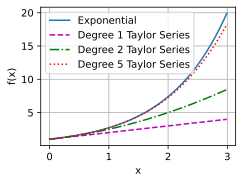

In [23]:
# Compute the exponential function
xs = torch.arange(0, 3, 0.01)
ys = torch.exp(xs)

# Compute a few Taylor series approximations
P1 = 1 + xs
P2 = 1 + xs + xs**2 / 2
P5 = 1 + xs + xs**2 / 2 + xs**3 / 6 + xs**4 / 24 + xs**5 / 120

d2l.plot(xs, [ys, P1, P2, P5], 'x', 'f(x)', legend=[
    "Exponential", "Degree 1 Taylor Series", "Degree 2 Taylor Series",
    "Degree 5 Taylor Series"])

#### Why Taylor Series Works Beyond Just "Local"

##### The Special Case of $e^x$

The Taylor series for $e^x$ centered at $x_0 = 0$ is:

$$e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}$$

This series has **infinite radius of convergence** — it converges to $e^x$ for **all** $x \in \mathbb{R}$, not just near 0.

##### Why This Happens

The key is the **radius of convergence**:

| Function | Taylor Series at $x_0=0$ | Radius of Convergence |
|----------|--------------------------|----------------------|
| $e^x$ | $\sum \frac{x^n}{n!}$ | $\infty$ (everywhere) |
| $\sin x$ | $\sum \frac{(-1)^n x^{2n+1}}{(2n+1)!}$ | $\infty$ (everywhere) |
| $\frac{1}{1-x}$ | $\sum x^n$ | 1 (only $\lvert x \rvert < 1$) |
| $\ln(1+x)$ | $\sum \frac{(-1)^{n+1} x^n}{n}$ | 1 (only $\lvert x \rvert < 1$) |

##### The Catch: Finite Truncation

When we use a **finite number of terms** (degree 1, 2, or 5), it's only a good approximation **locally**. As you move away from $x_0 = 0$:

- **Low degree**: Good only very close to 0
- **Higher degree**: Good over a wider range
- **Infinite terms**: Exact everywhere

In the plot:
- Degree 1 diverges quickly from $e^x$
- Degree 5 stays close up to about $x = 2$
- With enough terms, you could approximate $e^x$ accurately even at $x = 100$

##### Summary

> "Local approximation" refers to **truncated** Taylor series. The **full infinite series** for $e^x$ converges globally — but you need more terms as you move farther from the expansion point.

======================== Multivariable Calculus =======================

### Multivariable Calculus

This section reviews core ideas from calculus in multiple variables that are frequently used in machine learning, including partial derivatives, gradients, directional derivatives, optimization, and chain rules.

#### Partial Derivatives

For a function 
$$f(x_1, x_2, \ldots, x_n),$$
the **partial derivative** with respect to $x_i$ measures how $f$ changes when only $x_i$ changes (others fixed):

$$
\frac{\partial f}{\partial x_i}(x)
= \lim_{\Delta x_i \to 0}
\frac{f(x_1, \ldots, x_i+\Delta x_i, \ldots, x_n)
- f(x_1, \ldots, x_i, \ldots, x_n)}{\Delta x_i}.
$$

#### Gradient Vector

The **gradient** of $f$ is the vector of all partial derivatives:

$$
\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}.
$$

- It points in the direction of **steepest increase** of $f$.
- Its magnitude gives the rate of maximum increase.
- Gradient is central to optimization methods like gradient descent.

#### Directional Derivative

The **directional derivative** of $f$ at $x$ in direction $u$ is:

$$
D_{\mathbf{u}} f(x)
= \nabla f(x)^\top \mathbf{u}.
$$

It measures the rate of change of $f$ in an arbitrary direction $\mathbf{u}$.

#### Chain Rule (Multivariable)

If $f$ depends on intermediate variables that depend on $x$, the chain rule expresses total derivatives in terms of partial derivatives.

Example: if $z = f(x,y)$ and $x = g(t), y = h(t)$:

$$
\frac{dz}{dt}
= \frac{\partial f}{\partial x}\frac{dx}{dt}
+ \frac{\partial f}{\partial y}\frac{dy}{dt}.
$$

This generalizes to functions of many variables and vector inputs.

#### Jacobian Matrix

For a vector-valued function $f: \mathbb{R}^n \to \mathbb{R}^m$,

$$
f(x) = \begin{bmatrix}
f_1(x)\\
f_2(x)\\
\vdots\\
f_m(x)
\end{bmatrix},
$$

the **Jacobian** is the matrix of first partials:

$$
J_f(x)
= \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}.
$$

Each row is the gradient of one component function.  
- The Jacobian generalizes the derivative to vector outputs.

#### Hessian Matrix

For a scalar function $f: \mathbb{R}^n \to \mathbb{R}$, the **Hessian** is the matrix of second-order partial derivatives:

$$
H_f(x)
= \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots &
\frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}.
$$

- Hessian is symmetric if second partials are continuous.
- It characterizes local curvature and appears in Newton’s method and second-order optimization.

#### Gradient Descent in Multiple Dimensions

Gradient descent updates parameters $\mathbf{w}$ using the gradient:

$$
\mathbf{w}_{t+1}
= \mathbf{w}_t - \alpha \nabla f(\mathbf{w}_t),
$$

where $\alpha$ is the learning rate.

- This extends the single-variable idea to vector spaces.
- Convergence behavior depends on the shape of $f$ (curvature, convexity, step size).

#### Stationary Points and Critical Points

- A point $x^*$ is **stationary** if $\nabla f(x^*) = 0$.
- Stationary points include local minima, local maxima, and saddle points.
- Second-order information (Hessian) helps distinguish types:
  - If $H_f(x^*)$ is positive definite $\Rightarrow$ local minimum.
  - If negative definite $\Rightarrow$ local maximum.
  - Otherwise $\Rightarrow$ saddle point.

#### Multivariable Taylor Expansion

Around a point $a$:

$$
f(x)
\approx f(a)
+ \nabla f(a)^\top (x - a)
+ \tfrac{1}{2}(x - a)^\top H_f(a) (x - a)
+ \cdots
$$

This approximates functions locally and is used in optimization algorithms.

#### Level Sets and Gradient Geometry

- **Level sets** are sets where $f(x) = c$.
- Gradient is always **perpendicular** to level sets.
- This fact helps visualize contours and optimization paths.

#### Summary

- Partial derivatives break change into individual dimensions.
- Gradient unifies partials into a directional rate of change.
- Directional derivatives and chain rules describe how functions vary along directions or compositions.
- Jacobians and Hessians extend derivatives to vector outputs and second-order structure.
- These concepts are foundational for optimization, deep learning training, and analysis of multivariable functions.

Approximation Example

$$
f(x, y) = \log(e^x + e^y) \quad \text{with gradient} \quad \nabla f(x, y) = \left[ \frac{e^x}{e^x + e^y}, \frac{e^y}{e^x + e^y} \right].
$$

If we look at a point like $(0, \log(2))$, we see that

$$
f(x, y) = \log(3) \quad \text{with gradient} \quad \nabla f(x, y) = \left[ \frac{1}{3}, \frac{2}{3} \right].
$$

Thus, if we want to approximate $f$ at $(\epsilon_1, \log(2) + \epsilon_2)$, we see that we should have the specific instance of the linear approximation:

$$
f(\epsilon_1, \log(2) + \epsilon_2) \approx \log(3) + \frac{1}{3}\epsilon_1 + \frac{2}{3}\epsilon_2.
$$

In [24]:
%matplotlib inline
import numpy as np
import torch
from IPython import display
from mpl_toolkits import mplot3d
from d2l import torch as d2l


def f(x, y):
    return torch.log(torch.exp(x) + torch.exp(y))
def grad_f(x, y):
    return torch.tensor([torch.exp(x) / (torch.exp(x) + torch.exp(y)),
                     torch.exp(y) / (torch.exp(x) + torch.exp(y))])

epsilon = torch.tensor([0.01, -0.03])
grad_approx = f(torch.tensor([0.]), torch.log(
    torch.tensor([2.]))) + epsilon.dot(
    grad_f(torch.tensor([0.]), torch.log(torch.tensor(2.))))
true_value = f(torch.tensor([0.]) + epsilon[0], torch.log(
    torch.tensor([2.])) + epsilon[1])
f'approximation: {grad_approx}, true Value: {true_value}'

'approximation: tensor([1.0819]), true Value: tensor([1.0821])'

An example of Multivariable Taylor Expansion:

Suppose that $f(x_1, x_2) = a + b_1 x_1 + b_2 x_2 + c_{11} x_1^2 + c_{12} x_1 x_2 + c_{22} x_2^2$. This is the general form for a quadratic in two variables. If we look at the value of the function, its gradient, and its Hessian, all at the point zero:

$$
\begin{aligned}
f(0, 0) &= a, \\
\nabla f(0, 0) &= \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}, \\
\mathbf{H}f(0, 0) &= \begin{bmatrix} 2c_{11} & c_{12} \\ c_{12} & 2c_{22} \end{bmatrix},
\end{aligned}
$$

we can get our original polynomial back by saying

$$
f(\mathbf{x}) = f(0) + \nabla f(0) \cdot \mathbf{x} + \frac{1}{2} \mathbf{x}^\top \mathbf{H}f(0) \mathbf{x}.
$$

In general, if we computed this expansion any point $\mathbf{x}_0$, we see that

$$
f(\mathbf{x}) = f(\mathbf{x}_0) + \nabla f(\mathbf{x}_0) \cdot (\mathbf{x} - \mathbf{x}_0) + \frac{1}{2} (\mathbf{x} - \mathbf{x}_0)^\top \mathbf{H}f(\mathbf{x}_0) (\mathbf{x} - \mathbf{x}_0).
$$

This works for any dimensional input, and provides the best approximating quadratic to any function at a point. To give an example, let's plot the function

$$
f(x, y) = x e^{-x^2 - y^2}.
$$

One can compute that the gradient and Hessian are

$$
\nabla f(x, y) = e^{-x^2 - y^2} \begin{pmatrix} 1 - 2x^2 \\ -2xy \end{pmatrix} \quad \text{and} \quad \mathbf{H}f(x, y) = e^{-x^2 - y^2} \begin{pmatrix} 4x^3 - 6x & 4x^2 y - 2y \\ 4x^2 y - 2y & 4xy^2 - 2x \end{pmatrix}.
$$

And thus, with a little algebra, see that the approximating quadratic at $[-1, 0]^\top$ is

$$
f(x, y) \approx e^{-1} \left( -1 - (x + 1) + (x + 1)^2 + y^2 \right).
$$

/workspaces/pytorch-d2l/.venv310/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/tmp/ipykernel_43227/916336460.py:22: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


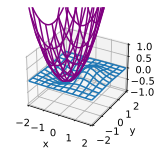

In [25]:
# Construct grid and compute function
x, y = torch.meshgrid(torch.linspace(-2, 2, 101),
                   torch.linspace(-2, 2, 101))

z = x*torch.exp(- x**2 - y**2)

# Compute approximating quadratic with gradient and Hessian at (1, 0)
w = torch.exp(torch.tensor([-1.]))*(-1 - (x + 1) + 2 * (x + 1)**2 + 2 * y**2)

# Plot function
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x.numpy(), y.numpy(), z.numpy(),
                  **{'rstride': 10, 'cstride': 10})
ax.plot_wireframe(x.numpy(), y.numpy(), w.numpy(),
                  **{'rstride': 10, 'cstride': 10}, color='purple')
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.set_figsize()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)
ax.dist = 12

### A Little Matrix Calculus

This section covers matrix calculus — the rules for differentiating functions involving vectors and matrices. These rules are essential for understanding backpropagation and optimization in deep learning.

#### Scalar Functions of Vectors

Consider a function $f: \mathbb{R}^n \to \mathbb{R}$ that takes a vector and returns a scalar. The gradient is:

$$
\nabla_{\mathbf{x}} f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}
$$

#### Useful Identities

Here are some commonly used matrix calculus identities:

**For vectors $\mathbf{a}, \mathbf{x} \in \mathbb{R}^n$:**

$$
\nabla_{\mathbf{x}} \mathbf{a}^\top \mathbf{x} = \mathbf{a}
$$

$$
\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{a} = \mathbf{a}
$$

$$
\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}
$$

**For a matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ and vector $\mathbf{x} \in \mathbb{R}^n$:**

$$
\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}
$$

If $\mathbf{A}$ is symmetric ($\mathbf{A} = \mathbf{A}^\top$):

$$
\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = 2\mathbf{A}\mathbf{x}
$$

**For matrix-vector products:**

$$
\nabla_{\mathbf{x}} \|\mathbf{A}\mathbf{x} - \mathbf{b}\|^2 = 2\mathbf{A}^\top(\mathbf{A}\mathbf{x} - \mathbf{b})
$$

#### Vector Functions of Vectors (Jacobians)

For a function $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^m$, the **Jacobian** matrix is:

$$
\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{x}} = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n} \end{bmatrix}
$$

**Useful Jacobian identities:**

$$
\frac{\partial}{\partial \mathbf{x}} (\mathbf{A}\mathbf{x}) = \mathbf{A}
$$

$$
\frac{\partial}{\partial \mathbf{x}} (\mathbf{x}^\top \mathbf{A}) = \mathbf{A}^\top
$$

#### Chain Rule for Vectors

If $\mathbf{y} = g(\mathbf{x})$ and $z = f(\mathbf{y})$, then:

$$
\nabla_{\mathbf{x}} z = \left(\frac{\partial \mathbf{y}}{\partial \mathbf{x}}\right)^\top \nabla_{\mathbf{y}} z = \mathbf{J}_g^\top \nabla_{\mathbf{y}} z
$$

This is the foundation of **backpropagation**: gradients flow backward through the transpose of Jacobians.

#### Scalar Functions of Matrices

For a function $f: \mathbb{R}^{m \times n} \to \mathbb{R}$, the gradient with respect to matrix $\mathbf{X}$ is:

$$
\nabla_{\mathbf{X}} f = \begin{bmatrix} \frac{\partial f}{\partial X_{11}} & \cdots & \frac{\partial f}{\partial X_{1n}} \\ \vdots & \ddots & \vdots \\ \frac{\partial f}{\partial X_{m1}} & \cdots & \frac{\partial f}{\partial X_{mn}} \end{bmatrix}
$$

**Useful identities:**

$$
\nabla_{\mathbf{X}} \text{tr}(\mathbf{X}) = \mathbf{I}
$$

$$
\nabla_{\mathbf{X}} \text{tr}(\mathbf{A}\mathbf{X}) = \mathbf{A}^\top
$$

$$
\nabla_{\mathbf{X}} \text{tr}(\mathbf{X}^\top \mathbf{A}) = \mathbf{A}
$$

$$
\nabla_{\mathbf{X}} \text{tr}(\mathbf{A}\mathbf{X}\mathbf{B}) = \mathbf{A}^\top \mathbf{B}^\top
$$

$$
\nabla_{\mathbf{X}} \|\mathbf{X}\|_F^2 = 2\mathbf{X}
$$

where $\|\mathbf{X}\|_F$ is the Frobenius norm.

#### Summary Table

| Expression | Gradient |
|------------|----------|
| $\mathbf{a}^\top \mathbf{x}$ | $\mathbf{a}$ |
| $\mathbf{x}^\top \mathbf{x}$ | $2\mathbf{x}$ |
| $\mathbf{x}^\top \mathbf{A} \mathbf{x}$ | $(\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$ |
| $\lVert \mathbf{A}\mathbf{x} - \mathbf{b} \rVert^2$ | $2\mathbf{A}^\top(\mathbf{A}\mathbf{x} - \mathbf{b})$ |

#### Why This Matters for Deep Learning

- **Backpropagation** is just repeated application of the chain rule
- **Gradient descent** requires computing $\nabla_{\mathbf{W}} L$ for weight matrices
- These identities let us derive gradients for linear layers, loss functions, and regularization terms analytically

======================== Integral Calculus ========================

### Integral Calculus

This section reviews key concepts of **integral calculus** for functions of a single variable, focusing on interpretation, basic rules, and relationships with derivatives. Integral calculus provides tools for computing areas under curves, accumulated change, and definite/indefinite integrals.

#### Indefinite Integrals: Antiderivatives

An **indefinite integral** of a function $f(x)$ is a function $F(x)$ whose derivative is $f(x)$:

$$
F'(x) = f(x)
\quad\Longleftrightarrow\quad
F(x) = \int f(x)\,\mathrm{d}x.
$$

Indefinite integrals represent **families of antiderivatives**, differing by a constant:

$$
\int f(x)\,\mathrm{d}x
= F(x) + C,
$$

where $C$ is the **constant of integration**.

#### Basic Antiderivative Rules

Some common integrals:

- Power rule (for $n\neq -1$):

  $$
  \int x^n\,\mathrm{d}x = \frac{x^{n+1}}{n+1} + C
  $$

- Exponential:

  $$
  \int e^x\,\mathrm{d}x = e^x + C
  $$

- Constant multiple:

  $$
  \int c\,f(x)\,\mathrm{d}x
  = c\int f(x)\,\mathrm{d}x
  $$

- Sum:

  $$
  \int [f(x)+g(x)]\,\mathrm{d}x
  = \int f(x)\,\mathrm{d}x + \int g(x)\,\mathrm{d}x.
  $$

#### Definite Integrals: Accumulated Change

A **definite integral** from $a$ to $b$ measures the net accumulated change of $f(x)$ over $[a,b]$:

$$
\int_a^b f(x)\,\mathrm{d}x
= F(b)-F(a),
$$

where $F$ is an antiderivative of $f$.  
This is the **Fundamental Theorem of Calculus**.

#### Interpretation of Definite Integrals

- The definite integral computes **signed area** under $f(x)$ from $x=a$ to $x=b$.
- If $f(x)\ge 0$ on $[a,b]$, the integral equals the area under the graph.
- If $f(x)$ changes sign, positive and negative areas cancel.

#### Properties of Definite Integrals

Key properties:

- **Linearity**:

  $$
  \int_a^b [c\,f(x)]\,\mathrm{d}x
  = c\int_a^b f(x)\,\mathrm{d}x
  $$

  $$
  \int_a^b [f(x)+g(x)]\,\mathrm{d}x
  = \int_a^b f(x)\,\mathrm{d}x + \int_a^b g(x)\,\mathrm{d}x
  $$

- **Reversal rule**:

  $$
  \int_b^a f(x)\,\mathrm{d}x
  = -\int_a^b f(x)\,\mathrm{d}x
  $$

- **Additivity**:

  $$
  \int_a^b f(x)\,\mathrm{d}x
  + \int_b^c f(x)\,\mathrm{d}x
  = \int_a^c f(x)\,\mathrm{d}x.
  $$

#### Integral as Area

The definite integral can be interpreted as the **signed area** between the curve $y=f(x)$ and the $x$-axis:

- Above the axis → positive area
- Below the axis → negative area

This interpretation is useful for visualizing accumulation and net change.

#### Techniques of Integration (Basic)

- **Substitution Rule** (change of variables):

  If $u=g(x)$ with continuous derivative:

  $$
  \int f(g(x)) g'(x)\,\mathrm{d}x
  = \int f(u)\,\mathrm{d}u.
  $$

- This transforms difficult integrals into simpler ones.

#### Relationship to Derivatives

The **Fundamental Theorem of Calculus** connects integration and differentiation:

1. **Differentiating an integral**:

   If $F(x)=\int_a^x f(t)\,\mathrm{d}t$, then

   $$
   F'(x)=f(x).
   $$

2. **Evaluating a definite integral**:

   If $F$ is any antiderivative of $f$, then

   $$
   \int_a^b f(x)\,\mathrm{d}x = F(b)-F(a).
   $$

This unifies derivative and integral as inverse operations.

#### Summary

- **Indefinite integrals** represent families of antiderivatives.
- **Definite integrals** compute net accumulation (signed area).
- Fundamental rules (linearity, additivity, reversal) simplify manipulation.
- Substitution helps evaluate complex integrals.
- The Fundamental Theorem of Calculus bridges derivatives and integrals.

#### Multiple Integrals

Sometimes we need to integrate in higher dimensions. For example, for a function of two variables $f(x, y)$, we may want the **volume under the surface** over a rectangular domain where $x \in [a,b]$ and $y \in [c,d]$.

We write the double integral as:
$$
\int_{[a,b]\times[c,d]} f(x,y)\,dx\,dy.
$$

##### Iterated integrals (Fubini’s Theorem intuition)

A key claim is that we can compute this by integrating one variable at a time (an *iterated integral*):
$$
\int_{[a,b]\times[c,d]} f(x,y)\,dx\,dy
=
\int_c^d\left(\int_a^b f(x,y)\,dx\right)\,dy.
$$

**Why this makes sense (discretization idea):**
Split the rectangle into $\epsilon \times \epsilon$ squares. Then the integral is approximated by a Riemann sum:
$$
\sum_{i,j}\epsilon^2 f(\epsilon i, \epsilon j).
$$

Since it’s just a finite sum, we can rearrange the order of summation:
$$
\sum_j \epsilon \left(\sum_i \epsilon f(\epsilon i,\epsilon j)\right).
$$

**(Image placeholder: diagram showing summing squares by columns then adding columns.)**

The inner sum corresponds to integrating over $x$ at a fixed $y$:
$$
G(\epsilon j) = \int_a^b f(x, \epsilon j)\,dx,
$$
and then the outer sum approximates $\int_c^d G(y)\,dy$, giving:
$$
\int_{[a,b]\times[c,d]} f(x,y)\,dx\,dy
=
\int_c^d\left(\int_a^b f(x,y)\,dx\right)\,dy.
$$

You can also integrate in the opposite order:
$$
\int_{[a,b]\times[c,d]} f(x,y)\,dx\,dy
=
\int_a^b\left(\int_c^d f(x,y)\,dy\right)\,dx.
$$
Often we compress notation: for $U=[a,b]\times[c,d]$,
$$
\int_U f(\mathbf{x})\,d\mathbf{x}.
$$

> Note: The text mentions Fubini’s theorem can fail for pathological functions, but for the continuous functions typically used in ML, this is not a concern.

#### Change of Variables in Multiple Integrals

Just like the 1D substitution rule, we can change variables in higher-dimensional integrals. We summarize the result without full derivation.

Let $\phi:\mathbb{R}^n \to \mathbb{R}^n$ be a reparameterization (assume $\phi$ is injective so it doesn’t “fold” the domain). Then:
$$
\int_{\phi(U)} f(\mathbf{x})\,d\mathbf{x}
=
\int_U f(\phi(\mathbf{x}))\left|\det(D\phi(\mathbf{x}))\right|\,d\mathbf{x}.
$$

Here $D\phi$ is the **Jacobian matrix**:
$$
D\phi =
\begin{bmatrix}
\frac{\partial \phi_1}{\partial x_1} & \cdots & \frac{\partial \phi_1}{\partial x_n}\\
\vdots & \ddots & \vdots\\
\frac{\partial \phi_n}{\partial x_1} & \cdots & \frac{\partial \phi_n}{\partial x_n}
\end{bmatrix}.
$$

##### Intuition: why the determinant appears
In 1D, the factor $\frac{du}{dx}$ tells how much the mapping stretches the axis.  
In $n$D, $\left|\det(D\phi)\right|$ tells how much $\phi$ locally scales **volume** (area/volume/hyper-volume).

##### Example: Gaussian integral via polar coordinates
Consider:
$$
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{-x^2-y^2}\,dx\,dy.
$$

Use polar change of variables:
$$
\phi(r,\theta) = (r\cos\theta, r\sin\theta),
\quad x=r\cos\theta,\; y=r\sin\theta.
$$

Then:
$$
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{-x^2-y^2}\,dx\,dy
=
\int_0^\infty \int_0^{2\pi} e^{-r^2}\left|\det(D\phi)\right|\,d\theta\,dr.
$$

Compute the Jacobian determinant:
$$
\left|\det(D\phi)\right|
=
\left|\det
\begin{bmatrix}
\cos\theta & -r\sin\theta\\
\sin\theta & r\cos\theta
\end{bmatrix}\right|
=
r(\cos^2\theta+\sin^2\theta)
=
r.
$$

So the integral becomes:
$$
\int_0^\infty \int_0^{2\pi} r e^{-r^2}\,d\theta\,dr
=
2\pi\int_0^\infty r e^{-r^2}\,dr
=
\pi.
$$